# Problem Notebook

By David Byrne

## Note to author:

Use proper levelled markdown headings to identify between problems. Use small cells. Write clean, readable and efficient code with meaningful variable names and consistent formatting. Remove this sub-heading for deadline.

*Requirements*

ipython
numpy
scipy
statsmodels
matplotlib
pandas
seaborn
sympy
nose
scikit-learn
qiskit[visualization]
yfinance

## Problem 1

**Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:**

* Facebook (META)
* Apple (AAPL)
* Amazon (AMZN)
* Netflix (NFLX)
* Google (GOOG)


**The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.**


### Problem Solving

**File Creation**

1. I created my `data` folder.
2. Next, I imported `datetime` to begin creating
3. I looked online to find further information about using `datetime` effectively - see [Programiz documentation](https://www.programiz.com/python-programming/datetime/strftime). 



**Using yfinance**

1. I installed `yfinance`
2. I researched on using `yfinance`, finding documentation on [Geeks for Geeks](https://www.geeksforgeeks.org/python/how-to-use-yfinance-api-with-python/).
3. Following documentation, I defined the tickers and created a data function to quickly draw up the required info about each ticker.

**Combining File Creation & yfinance**


In [6]:
from datetime import datetime
import os
# Datetime is to give the filenames their necessary year, month, days, hours, minutes and seconds

now = datetime.now()

timestamp = now.strftime("%Y%m%d-%H%M%S")
print(timestamp)

file = f"data/{timestamp}.csv" # creates csv file with timestamp name

with open(file, "w") as f:
    f.write("Test please work")

20251015-190309


In [7]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [8]:
import yfinance as yf
import pandas as pd

# create tickers

tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

data = yf.download(tickers, interval="1h", period="5d")

print(data.head())



C:\Users\daveb\AppData\Local\Temp\ipykernel_20304\1304065108.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, interval="1h", period="5d")
[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-10-09 13:30:00+00:00  254.979996  222.699997  242.410004  719.690002   
2025-10-09 14:30:00+00:00  254.895004  223.100006  240.464996  719.403198   
2025-10-09 15:30:00+00:00  253.845001  224.162994  241.720001  727.580017   
2025-10-09 16:30:00+00:00  253.457596  223.860001  241.509995  726.179993   
2025-10-09 17:30:00+00:00  253.559998  226.270004  241.285004  730.280029   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-10-09 13:30:00+00:00  1229.939941  257.359985  224.065002  244.850006   
2025-10-09 14:30:00+00:00  1227.199951  255.119995  223.100006  241.462

In [9]:
timestamp = now.strftime("%Y%m%d-%H%M%S")
file = f"data/{timestamp}.csv" # creates csv file with timestamp name

tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

data = yf.download(tickers, interval="1h", period="5d")

data.to_csv(file)

print(f"The data has been saved")

C:\Users\daveb\AppData\Local\Temp\ipykernel_20304\374070458.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, interval="1h", period="5d")
[*********************100%***********************]  5 of 5 completed

The data has been saved


## Problem 2

**Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`. Create the `plots` folder if you don't already have one.**



reference - https://www.w3schools.com/python/ref_list_sort.asp

*clean up later*

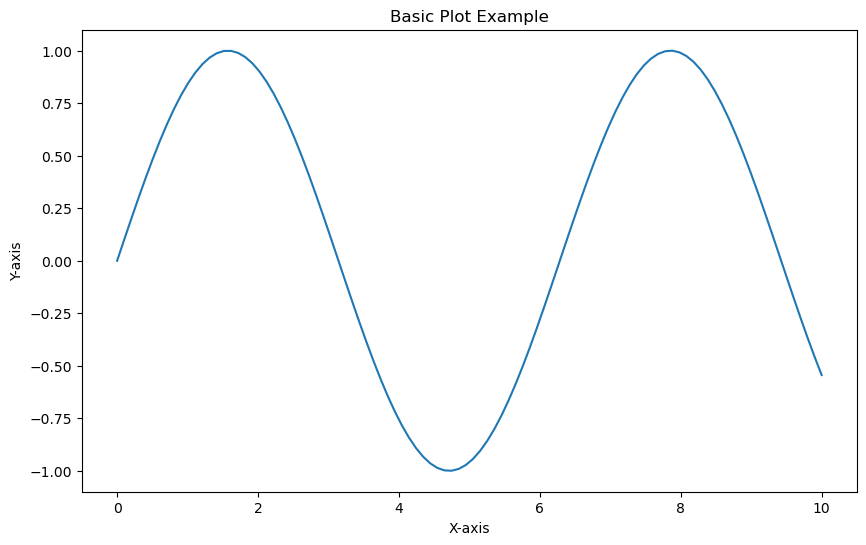

In [ ]:

# refresh on basics
'''
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os

# back to basics


x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Basic Plot Example')

timestamp = now.strftime("%Y%m%d-%H%M%S")
file_path = f"plots/basic_plot_{timestamp}.png"
os.makedirs("plots", exist_ok=True)
plt.savefig(file_path)
'''
    




Plot saved to plots/stock_prices_20251015-192407.png


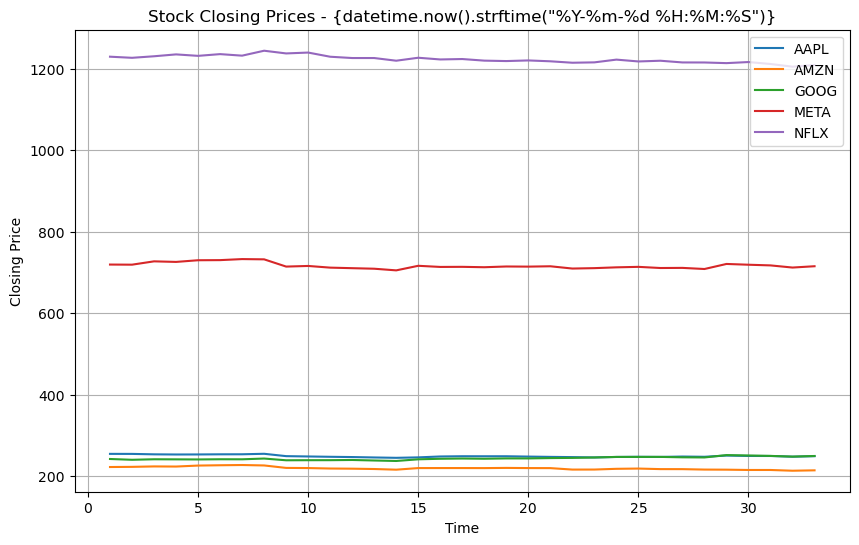

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os

def plot_data():

    data_files = [f for f in os.listdir("data") if f.endswith(".csv")]
    if not data_files:
        print("No data files found in the 'data' directory.")
        return
    
    # sort files to get the latest one
    data_files.sort(reverse=True)
    latest_file = data_files[0]
    file_path = os.path.join("data", latest_file)

    # read the latest data file
    df = pd.read_csv(file_path, header=[0,1], index_col=0)

    # extract closing data
    close_data = df['Close']

    # plot closing prices
    plt.figure(figsize=(10, 6))
    for ticker in close_data.columns:
        plt.plot(close_data.index, close_data[ticker], label=ticker)
    plt.xlabel('Time')
    plt.ylabel('Closing Price')
    plt.title('Stock Closing Prices - {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')
    plt.legend()
    plt.grid(True)

    # timestamp filename
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    file_path = f"plots/stock_prices_{timestamp}.png"
    os.makedirs("plots", exist_ok=True)
    plt.savefig(file_path)
    print(f"Plot saved to {file_path}")

# run function
plot_data()

## Problem 3: Script

**Create a Python script called `faang.py` in the root of your repository. Copy the above functions into it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading all the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Exmpalin the steps you took in your notebook.**

